In [3]:
using Pkg
Pkg.add("Images")
Pkg.add("ImageFiltering")
Pkg.add("TestImages")
Pkg.add("ImageShow")
Pkg.add("ImageTransformations")
Pkg.add("ImageIO")
Pkg.add("ImageEdgeDetection")
Pkg.add("Noise")

   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
   Installed ConstructionBase ─── v1.3.0
   Installed Setfield ─────────── v0.8.2
   Installed ImageEdgeDetection ─ v0.1.5
    Updating `~/Project.toml`
  [2b14c160] + ImageEdgeDetection v0.1.5
    Updating `~/Manifest.toml`
  [187b0558] + ConstructionBase v1.3.0
  [2b14c160] + ImageEdgeDetection v0.1.5
  [efcf1570] + Setfield v0.8.2
  [9fa8497b] + Future
Precompil

In [11]:
# Includes n imports
using TestImages
using Images
using ImageFiltering
using ImageShow
using ImageIO
using ImageEdgeDetection
using ImageEdgeDetection: Percentile
using Noise

In [34]:
function rgb_conv(vec::RGB)
    vec.r+vec.b+vec.g
end
function edges(img)
    img = Gray.(img)
    img_edges = detect_edges(img, Canny(spatial_scale = 1.4, low = Percentile(90), high = Percentile(96)))
    return img_edges
end

edges (generic function with 1 method)

In [ ]:
im = load("test_1.jpeg")
#im = Gray.(im)
im = imfilter(im, reflect(Kernel.gaussian(5)));
imgg_ed = edges(im)
im = imresize(im,ratio=1/8)
imgg_ed = imresize(imgg_ed,ratio=1/8)
#####
imf = load("mypic.jpeg")
imf_ed = edges(imf)
imf = imresize(imf,ratio=1/8)
imf_ed = imresize(imf_ed,ratio=1/8)
#####
imgg = im
sz = size(imf)
minn = Inf
tup = (0,0)
i = 1
#####
#=
while i >= 0.125
    for x ∈ 1:size(imgg)[1]
        for y ∈ 1:size(imgg)[2]
                tmp_imf = imresize(imf,ratio=i)
                tmp_sz = sz .* i
                println(sum(rgb_conv.(imgg[x:x+tmp_sz[1]-1,y:y+tmp_sz[2]-1] .- tmp_imf)))
            end
        end
    end
    i/=2
end
=#
while i >= 0.125
    for x ∈ 1:size(imgg)[1]
        for y ∈ 1:size(imgg)[2]
            try 
                tmp_imf = imresize(imf,ratio=i)
                tmp_imf_ed = imresize(imf_ed,ratio=i)
                tmp_sz = sz .* i
                t = sum(rgb_conv.(imgg[x:x+tmp_sz[1]-1,y:y+tmp_sz[2]-1] - tmp_imf)) + WEIGHT*sum((imgg_ed[x:x+tmp_sz[1]-1,y:y+tmp_sz[2]-1] - tmp_imf_ed)
                if ) < minn
                    #println("Zus was here")
                    minn = sum(rgb_conv.(imgg[x:x+tmp_sz[1]-1,y:y+tmp_sz[2]-1] .- tmp_imf))
                    tup = (x,y)
                end
            catch
                continue
            end
        end
    end
    i/=2
end
println(minn)
imgg[tup[1]:tup[1]+sz[1],tup[2]:tup[2]+sz[2]]  
            

In [37]:
println(size(imgg))
rgb_conv.(imgg)

(405, 540)


405×540 Array{N0f8,2} with eltype N0f8:
 0.267  0.243  0.278  0.235  0.204  …  0.467  0.565  0.733  0.71   0.114
 0.239  0.282  0.29   0.31   0.243     0.478  0.576  0.694  0.831  0.8
 0.294  0.298  0.227  0.227  0.29      0.533  0.49   0.71   0.761  0.835
 0.255  0.314  0.267  0.314  0.294     0.522  0.984  0.698  0.176  0.486
 0.251  0.251  0.251  0.302  0.267     0.541  0.722  0.659  0.522  0.553
 0.318  0.302  0.263  0.243  0.337  …  0.545  0.737  0.51   0.459  0.478
 0.282  0.235  0.306  0.31   0.333     0.522  0.8    0.455  0.49   0.443
 0.282  0.314  0.361  0.29   0.318     0.082  0.733  0.024  0.392  0.471
 0.373  0.306  0.271  0.255  0.322     0.729  0.757  0.792  0.953  0.451
 0.408  0.333  0.282  0.278  0.263     0.757  0.827  0.804  0.8    0.769
 0.494  0.478  0.424  0.306  0.31   …  0.855  0.867  0.863  0.875  0.784
 0.325  0.467  0.463  0.416  0.357     0.875  0.871  0.855  0.902  0.886
 0.271  0.318  0.443  0.51   0.435     0.918  0.906  0.851  0.878  0.875
 ⋮           

(160, 124)


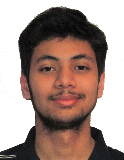

In [7]:
println(size(imf))
imf

In [10]:
tst_im = rand(5,5)
@view tst_im[:,:]

5×5 view(::Matrix{Float64}, :, :) with eltype Float64:
 0.103417  0.955192  0.289268  0.188227   0.829243
 0.778976  0.308172  0.475554  0.0227875  0.314082
 0.285392  0.860942  0.457206  0.0944368  0.814898
 0.818407  0.184738  0.366024  0.748617   0.549875
 0.990151  0.378285  0.924384  0.567616   0.388834

In [19]:
typeof(imgg[5:164,10:133] - imf)

Matrix{RGB{N0f8}} (alias for Array{RGB{Normed{UInt8, 8}}, 2})

In [22]:
rgb_RGB(0.5,0.5,0.5) - RGB(0.2,0.2,0.1)

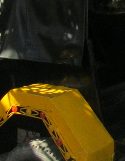

In [41]:
imgg[tup[1]:tup[1]+sz[1],tup[2]:tup[2]+sz[2]]  

In [56]:
RGB(1.0,0.0,0.0)
RGB.(tst_im)
im_rgb = rand(RGB,5,5)
Gray.(im_rgb)
size(im_rgb)

(5, 5)

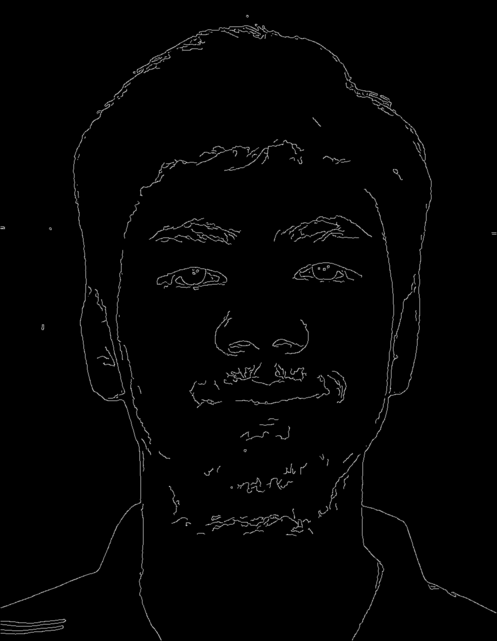

In [35]:
a = load("mypic.jpeg")
edges(a)